# <span style="color:#ffffff; font-size: 1%;">[1] 🏦 Introduction</span>

<div style=" border-bottom: 8px solid #A9A9A9; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #F2F4F2; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #5F5F5F; padding: 20px 20px;">[1] 🏦💳 Introduction</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://images.pexels.com/photos/5466788/pexels-photo-5466788.jpeg?cs=srgb&dl=pexels-olia-danilevich-5466788.jpg&fm=jpg'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 10px;">
  </div>
</div>

<div style="position: relative; height: 200px; background-image: url('https://www.landmarkspace.co.uk/wp-content/uploads/2022/04/Royal-Exchange-Bank-Serviced-Office-1.webp'); background-size: cover; background-position: center; border-radius: 15px; overflow: hidden;"></div>

<div style="display: flex; flex-direction: column; align-items: center; font-size: 16px;">
  <div style="width: 100%; padding: 10px; font-size: 16px;">
    <p style="color: #333; font-size: 16px; line-height: 1.6; text-align: justify;">
      Welcome to the Binary Classification with a Bank Churn Dataset notebook! 🚀 In this data-driven adventure, we'll be delving into the world of customer churn prediction. The challenge? Predict the probability of a customer exiting using classification techniques and explore the dynamics of customer attrition.
      <br><br>
      Our dataset is a valuable resource, containing information about customers and their interactions with the bank. 📊 Get ready to analyze patterns, understand the features that influence customer churn, and build models to predict whether a customer is likely to exit or not.
      <br><br>
      As we embark on this journey, our goal is to minimize the prediction errors and create a robust model for identifying potential churn. But it's not all theory— we've got a test dataset to evaluate the performance of our models! 🧪
      <br><br>
      So, buckle up for an exciting ride through data exploration, model building, and evaluation, aiming to enhance our understanding of customer churn in the banking industry. 🌟✨ Best of luck, and let the predictions begin!
    </p>
  </div>
</div>

# <span style="color:#ffffff; font-size: 1%;">[2] 🔍 Dataset Overview</span>

<div style=" border-bottom: 8px solid #A9A9A9; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #F2F4F2; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #5F5F5F; padding: 20px 20px;">[2] 📊🔍 Dataset Overview</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://images.pexels.com/photos/5466788/pexels-photo-5466788.jpeg?cs=srgb&dl=pexels-olia-danilevich-5466788.jpg&fm=jpg'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 10px;">
  </div>
</div>

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9"> [2.1] Loading the Datasets & Libraries :</span></b>

In [1]:
# Importing Libraries

import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

import optuna
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, median_absolute_error
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import numpy as np
from scipy import stats

In [2]:
# Reading .csv data file

train_data = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")
original_data = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9"> [2.2] Initial Observations or Trends :</span></b>

In [3]:
 # Having a look at the dataset

train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [5]:
original_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [6]:
# Checking the number of rows and columns

num_train_rows, num_train_columns = train_data.shape

num_test_rows, num_test_columns = test_data.shape

num_original_rows, num_original_columns = original_data.shape

print("Training Data:")
print(f"Number of Rows: {num_train_rows}")
print(f"Number of Columns: {num_train_columns}\n")

print("Test Data:")
print(f"Number of Rows: {num_test_rows}")
print(f"Number of Columns: {num_test_columns}\n")

print("Original Data:")
print(f"Number of Rows: {num_original_rows}")
print(f"Number of Columns: {num_original_columns}")

Training Data:
Number of Rows: 165034
Number of Columns: 14

Test Data:
Number of Rows: 110023
Number of Columns: 13

Original Data:
Number of Rows: 10002
Number of Columns: 14


In [7]:
# Creating a table for missing values, unique values and data types of the features

missing_values_train = pd.DataFrame({'Feature': train_data.columns,
                              '[TRAIN] No. of Missing Values': train_data.isnull().sum().values,
                              '[TRAIN] % of Missing Values': ((train_data.isnull().sum().values)/len(train_data)*100)})

missing_values_test = pd.DataFrame({'Feature': test_data.columns,
                             '[TEST] No.of Missing Values': test_data.isnull().sum().values,
                             '[TEST] % of Missing Values': ((test_data.isnull().sum().values)/len(test_data)*100)})

missing_values_original = pd.DataFrame({'Feature': original_data.columns,
                             '[ORIGINAL] No.of Missing Values': original_data.isnull().sum().values,
                             '[ORIGINAL] % of Missing Values': ((original_data.isnull().sum().values)/len(original_data)*100)})

unique_values = pd.DataFrame({'Feature': train_data.columns,
                              'No. of Unique Values[FROM TRAIN]': train_data.nunique().values})

feature_types = pd.DataFrame({'Feature': train_data.columns,
                              'DataType': train_data.dtypes})

merged_df = pd.merge(missing_values_train, missing_values_test, on='Feature', how='left')
merged_df = pd.merge(merged_df, missing_values_original, on='Feature', how='left')
merged_df = pd.merge(merged_df, unique_values, on='Feature', how='left')
merged_df = pd.merge(merged_df, feature_types, on='Feature', how='left')

merged_df

,Feature,[TRAIN] No. of Missing Values,[TRAIN] % of Missing Values,[TEST] No.of Missing Values,[TEST] % of Missing Values,[ORIGINAL] No.of Missing Values,[ORIGINAL] % of Missing Values,No. of Unique Values[FROM TRAIN],DataType
0,id,0,0.0,0.0,0.0,NaN,NaN,165034,int64
1,CustomerId,0,0.0,0.0,0.0,0.0,0.000000,23221,int64
2,Surname,0,0.0,0.0,0.0,0.0,0.000000,2797,object
3,CreditScore,0,0.0,0.0,0.0,0.0,0.000000,457,int64
4,Geography,0,0.0,0.0,0.0,1.0,0.009998,3,object
5,Gender,0,0.0,0.0,0.0,0.0,0.000000,2,object
6,Age,0,0.0,0.0,0.0,1.0,0.009998,71,float64
7,Tenure,0,0.0,0.0,0.0,0.0,0.000000,11,int64
8,Balance,0,0.0,0.0,0.0,0.0,0.000000,30075,float64
9,NumOfProducts,0,0.0,0.0,0.0,0.0,0.000000,4,int64


In [8]:
# Count duplicate rows in train_data
train_duplicates = train_data.duplicated().sum()

# Count duplicate rows in test_data
test_duplicates = test_data.duplicated().sum()

# Count duplicate rows in original_data
original_duplicates = original_data.duplicated().sum()

# Print the results
print(f"Number of duplicate rows in train_data: {train_duplicates}")
print(f"Number of duplicate rows in test_data: {test_duplicates}")
print(f"Number of duplicate rows in test_data: {original_duplicates}")

Number of duplicate rows in train_data: 0
Number of duplicate rows in test_data: 0
Number of duplicate rows in test_data: 2


In [9]:
# Having a look at the description of all the numerical columns present in the dataset

train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


# <span style="color:#ffffff; font-size: 1%;">[3] 💡 Exploratory Data Analysis (EDA)</span>

<div style=" border-bottom: 8px solid #A9A9A9; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #F2F4F2; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #5F5F5F; padding: 20px 20px;">[3] 📈💡EDA</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://images.pexels.com/photos/5466788/pexels-photo-5466788.jpeg?cs=srgb&dl=pexels-olia-danilevich-5466788.jpg&fm=jpg'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 10px;">
  </div>
</div>

In [10]:
numerical_variables = ['CreditScore','Age', 'Balance','EstimatedSalary' ]
target_variable = 'Exited'
categorical_variables = ['Geography', 'Gender', 'Tenure','NumOfProducts', 'HasCrCard','IsActiveMember']

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9"> [3.1] Numerical Features </b>

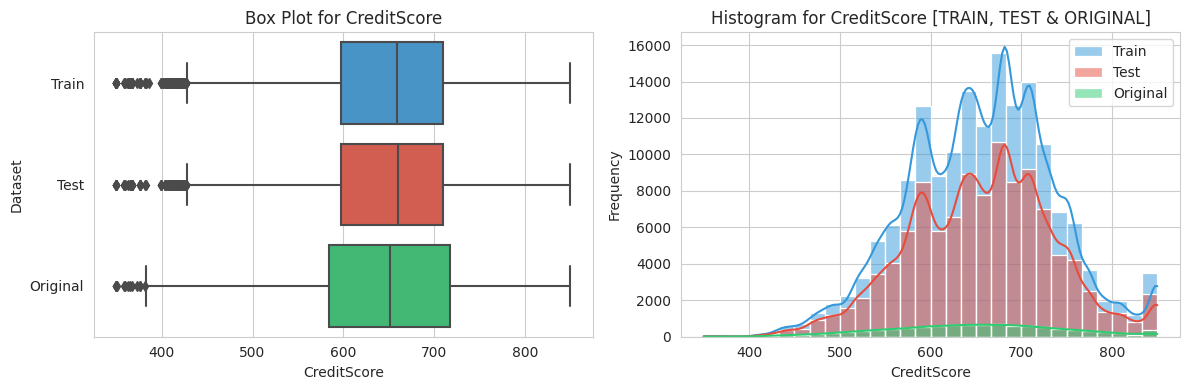

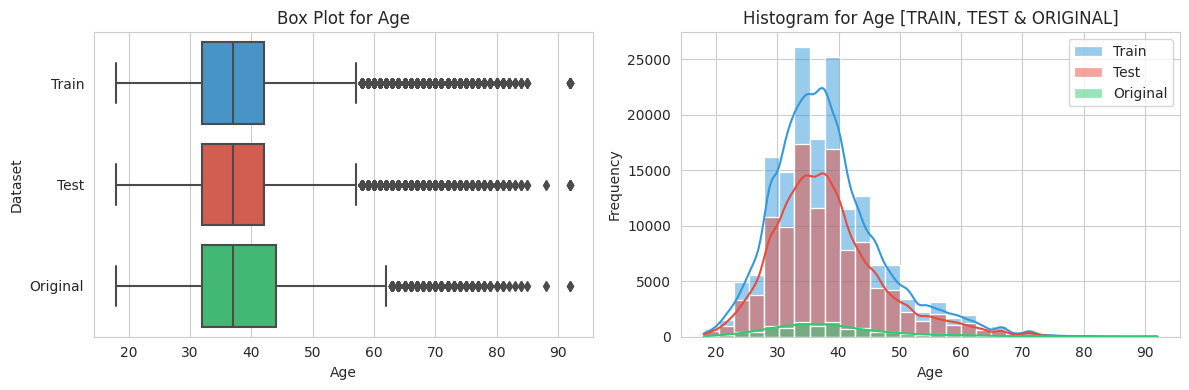

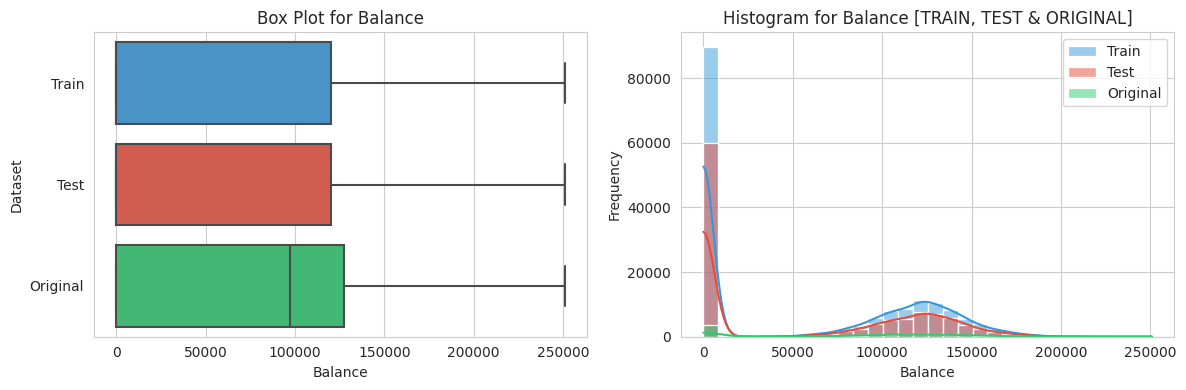

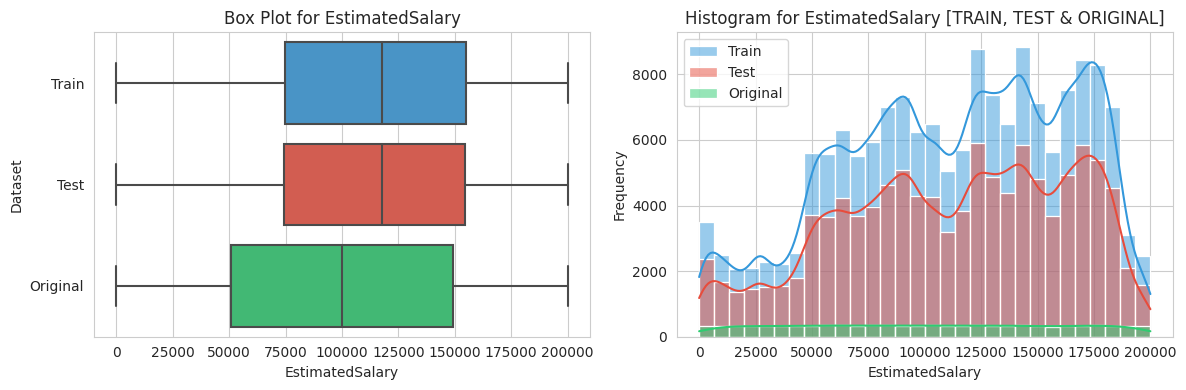

In [11]:
# Analysis of all NUMERICAL features

# Define a custom color palette
custom_palette = ['#3498db', '#e74c3c','#2ecc71']

# Add 'Dataset' column to distinguish between train and test data
train_data['Dataset'] = 'Train'
test_data['Dataset'] = 'Test'
original_data['Dataset'] = 'Original'

variables = [col for col in train_data.columns if col in numerical_variables]

# Function to create and display a row of plots for a single variable
def create_variable_plots(variable):
    sns.set_style('whitegrid')
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=pd.concat([train_data, test_data,original_data.dropna()]), x=variable, y="Dataset", palette=custom_palette)
    plt.xlabel(variable)
    plt.title(f"Box Plot for {variable}")

    # Separate Histograms
    plt.subplot(1, 2, 2)
    sns.histplot(data=train_data, x=variable, color=custom_palette[0], kde=True, bins=30, label="Train")
    sns.histplot(data=test_data, x=variable, color=custom_palette[1], kde=True, bins=30, label="Test")
    sns.histplot(data=original_data.dropna(), x=variable, color=custom_palette[2], kde=True, bins=30, label="Original")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {variable} [TRAIN, TEST & ORIGINAL]")
    plt.legend()

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

# Perform univariate analysis for each variable
for variable in variables:
    create_variable_plots(variable)

# Drop the 'Dataset' column after analysis
train_data.drop('Dataset', axis=1, inplace=True)
test_data.drop('Dataset', axis=1, inplace=True)
original_data.drop('Dataset', axis=1, inplace=True)

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9"> [3.2] Categorical Features </b>

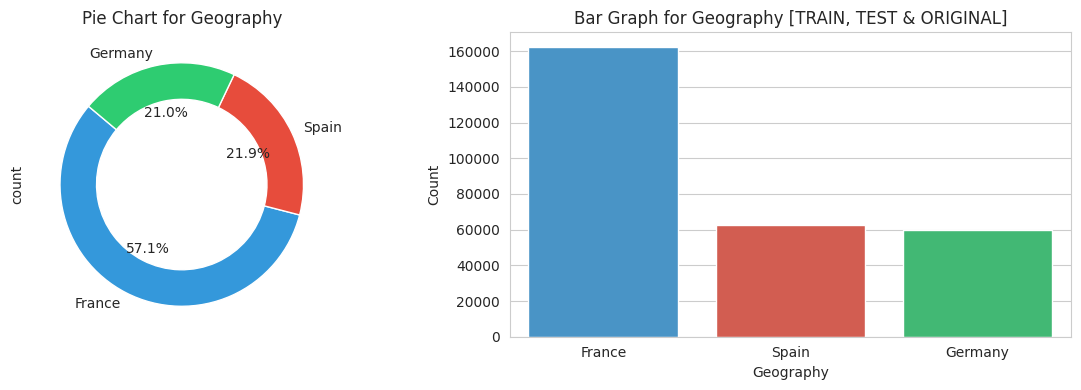

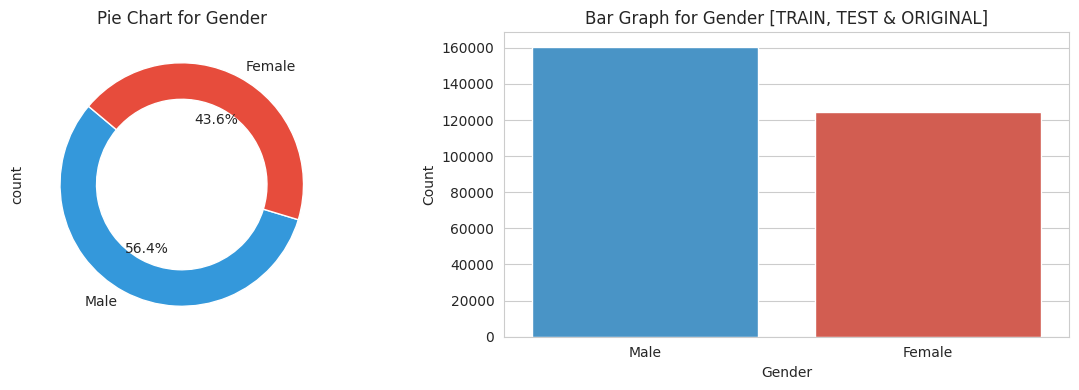

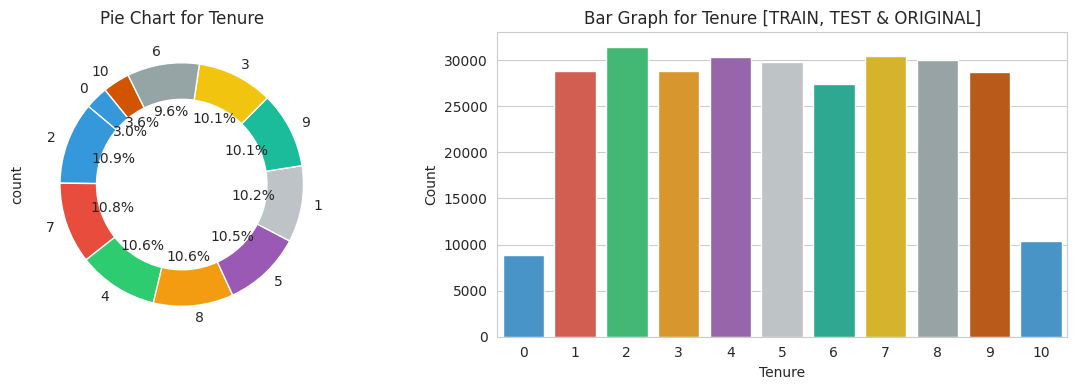

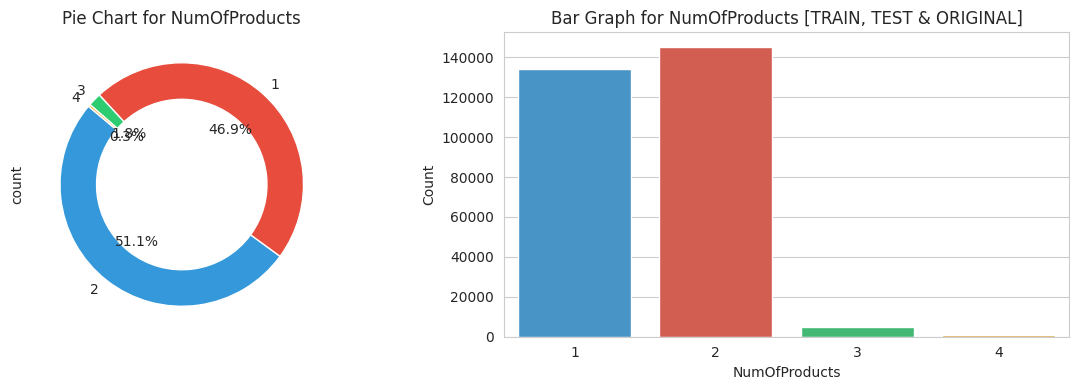

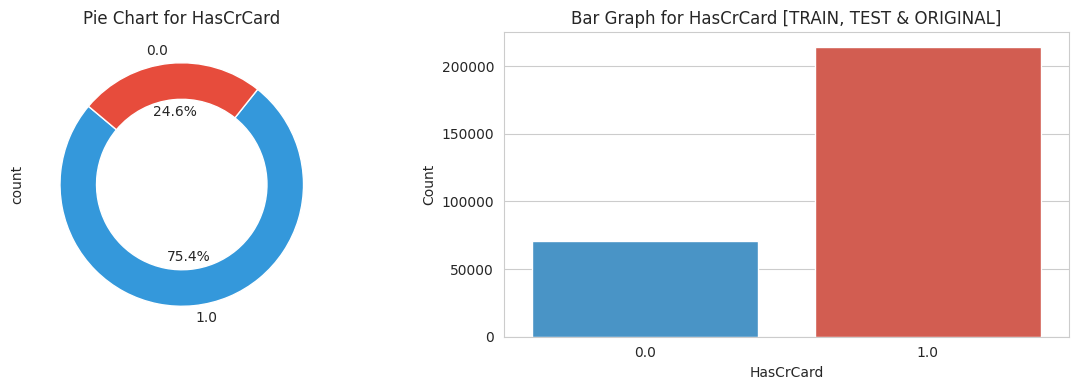

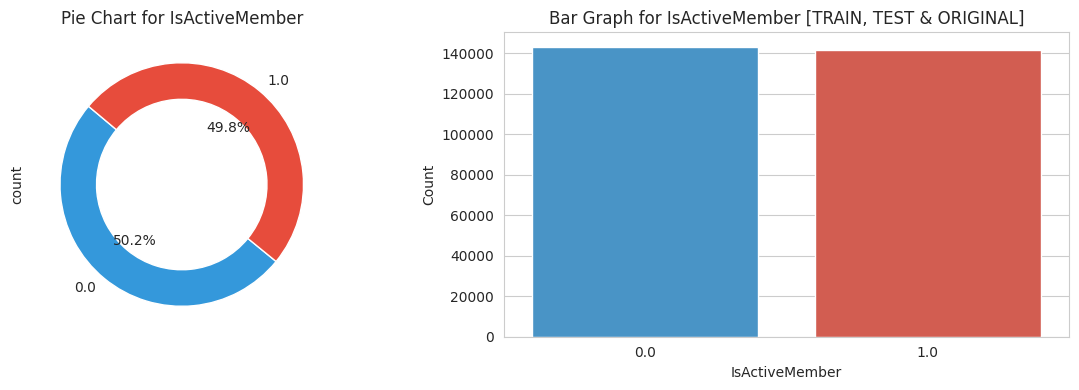

In [12]:
# Analysis of all CATEGORICAL features

# Define a custom color palette for categorical features
categorical_palette = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#bdc3c7', '#1abc9c', '#f1c40f', '#95a5a6', '#d35400']

# List of categorical variables
categorical_variables = [col for col in categorical_variables]

# Function to create and display a row of plots for a single categorical variable
def create_categorical_plots(variable):
    sns.set_style('whitegrid')
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Pie Chart
    plt.subplot(1, 2, 1)
    train_data[variable].value_counts().plot.pie(autopct='%1.1f%%', colors=categorical_palette, wedgeprops=dict(width=0.3), startangle=140)
    plt.title(f"Pie Chart for {variable}")

    # Bar Graph
    plt.subplot(1, 2, 2)
    sns.countplot(data=pd.concat([train_data, test_data, original_data.dropna()]), x=variable, palette=categorical_palette)
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.title(f"Bar Graph for {variable} [TRAIN, TEST & ORIGINAL]")

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

# Perform univariate analysis for each categorical variable
for variable in categorical_variables:
    create_categorical_plots(variable)

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9"> [3.3] Target Feature </b>

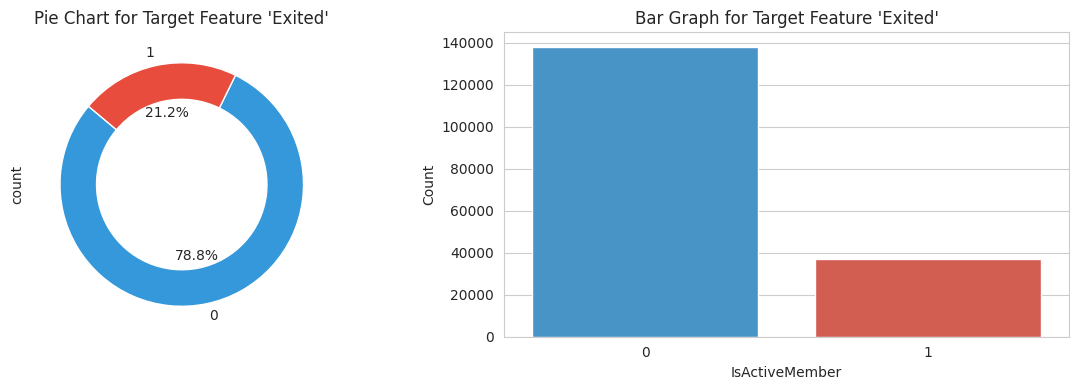

In [13]:
# Analysis of TARGET feature

# Define a custom color palette for categorical features
target_palette = ['#3498db', '#e74c3c']

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Pie Chart
plt.subplot(1, 2, 1)
train_data[target_variable].value_counts().plot.pie(autopct='%1.1f%%', colors=target_palette, wedgeprops=dict(width=0.3), startangle=140)
plt.title(f"Pie Chart for Target Feature 'Exited'")

# Bar Graph
plt.subplot(1, 2, 2)
sns.countplot(data=pd.concat([train_data, original_data.dropna()]), x=target_variable, palette=target_palette)
plt.xlabel(variable)
plt.ylabel("Count")
plt.title(f"Bar Graph for Target Feature 'Exited'")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9"> [3.4] Bivariate Analysis </b>

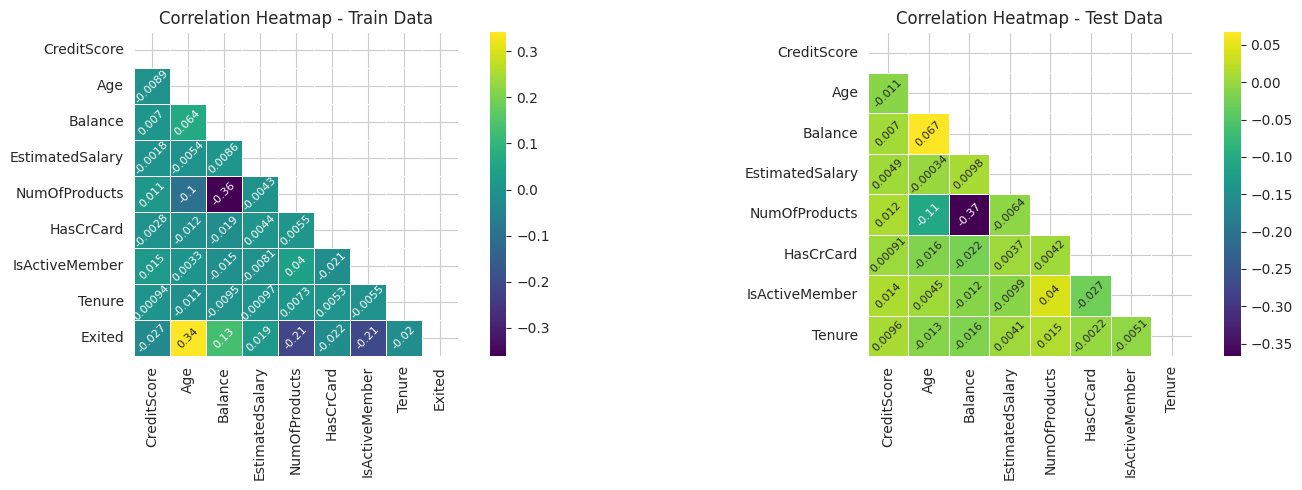

In [14]:
variables = [col for col in train_data.columns if col in numerical_variables]

cat_variables_train = ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Tenure', 'Exited']
cat_variables_test = ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Tenure']

# Adding variables to the existing list
train_variables = variables + cat_variables_train
test_variables = variables + cat_variables_test

# Calculate correlation matrices for train_data and test_data
corr_train = train_data[train_variables].corr()
corr_test = test_data[test_variables].corr()

# Create masks for the upper triangle
mask_train = np.triu(np.ones_like(corr_train, dtype=bool))
mask_test = np.triu(np.ones_like(corr_test, dtype=bool))

# Set the text size and rotation
annot_kws = {"size": 8, "rotation": 45}

# Generate heatmaps for train_data
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
ax_train = sns.heatmap(corr_train, mask=mask_train, cmap='viridis', annot=True,
                      square=True, linewidths=.5, xticklabels=1, yticklabels=1, annot_kws=annot_kws)
plt.title('Correlation Heatmap - Train Data')

# Generate heatmaps for test_data
plt.subplot(1, 2, 2)
ax_test = sns.heatmap(corr_test, mask=mask_test, cmap='viridis', annot=True,
                     square=True, linewidths=.5, xticklabels=1, yticklabels=1, annot_kws=annot_kws)
plt.title('Correlation Heatmap - Test Data')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# <span style="color:#ffffff; font-size: 1%;">[4] 🛠️ Data Preprocessing</span>

<div style=" border-bottom: 8px solid #A9A9A9; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #F2F4F2; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #5F5F5F; padding: 20px 20px;">[4] 🛠️🧹 Data Preprocessing</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://images.pexels.com/photos/5466788/pexels-photo-5466788.jpeg?cs=srgb&dl=pexels-olia-danilevich-5466788.jpg&fm=jpg'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 10px;">
  </div>
</div>

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">[4.1] Feature Engineering</b>

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder

def tf_idf(df, column, n, p):
    # Initialize TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(max_features=n)
    
    # Transform data
    vectors = vectorizer.fit_transform(df[column])
    
    # Apply TruncatedSVD for dimensionality reduction
    svd = TruncatedSVD(p)
    x_pca = svd.fit_transform(vectors)
    
    # Convert to DataFrame
    tfidf_df = pd.DataFrame(x_pca)

    # Naming columns in the new DataFrame
    cols = [(column + "_tfidf_" + str(f)) for f in tfidf_df.columns.to_list()]
    tfidf_df.columns = cols
    
    # Reset the index of the DataFrame before concatenation
    df = df.reset_index(drop=True)

    # Concatenate transformed features with original data
    df = pd.concat([df, tfidf_df], axis="columns")
    
    return df

def perform_feature_engineering(df):
    # Age Group
    age_bins = [0, 18, 30, 40, 50, 60, 100]
    df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=False, right=False)

    # Balance Category
    balance_bins = [-np.inf, 0, 10000, 50000, 100000, np.inf]
    df['BalanceCategory'] = pd.cut(df['Balance'], bins=balance_bins, labels=False, right=False)

    # Credit Score Category
    credit_bins = [0, 500, 600, 700, 800, 850]
    df['CreditScoreCategory'] = pd.cut(df['CreditScore'], bins=credit_bins, labels=False, right=False)

    # Tenure Group
    tenure_bins = [0, 2, 5, 10, np.inf]
    df['TenureGroup'] = pd.cut(df['Tenure'], bins=tenure_bins, labels=False, right=False)

    # Salary to Balance Ratio
    df['SalaryToBalanceRatio'] = df['EstimatedSalary'] / (df['Balance'] + 1)  # Adding 1 to avoid division by zero

    # Credit Card and Active Member Interaction
    df['CreditCard_ActiveMember'] = df['HasCrCard'] * df['IsActiveMember']

    # Apply TF-IDF to 'Surname' column
    df = tf_idf(df, 'Surname', n=1000, p=5)

    # ABP Interaction
    df['ABPInteraction'] = df['Age'] * df['Balance'] / df['NumOfProducts']

    df['Geo_Gender'] = df['Geography'] + '_' + df['Gender']
        
    df['Products_Per_Tenure'] = np.where(df['Tenure'] != 0, df['NumOfProducts'] / df['Tenure'], df['NumOfProducts'])
    
    df['Customer_Status'] = df['Tenure'].apply(lambda x: 'New' if x < 2 else 'Long-term')
    
    return df

# Apply the function to the training data
train_data = perform_feature_engineering(train_data)

# Apply the function to the test data
test_data = perform_feature_engineering(test_data)

In [16]:
columns_to_drop = ['CustomerId','Surname']
train_data.drop(columns_to_drop, axis=1, inplace=True)
test_data.drop(columns_to_drop, axis=1, inplace=True)
original_data.drop(['CustomerId','RowNumber','Surname'], axis=1, inplace=True)

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">[4.2] Outlier Detection</b>

In [17]:
columns_to_check = numerical_variables

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for column in columns_to_check:
    train_data = remove_outliers_iqr(train_data, column)

In [18]:
y = train_data['Exited']

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">[4.3] Transformation of Distributions</b>

In [19]:
# [FOR TRAIN]
# Identify features with skewness greater than 0.75
# Get the index of the data to be transformed
skewed_features = train_data[numerical_variables].skew()[train_data[numerical_variables].skew() > 0.75].index.values

# Print the list of variables to be transformed
print("Features to be transformed (skewness > 0.75):")
display(skewed_features)

# Apply log1p transformation to skewed features
train_data[skewed_features] = np.log1p(train_data[skewed_features])

Features to be transformed (skewness > 0.75):


array([], dtype=object)

In [20]:
# [FOR TEST]
# Identify features with skewness greater than 0.75
# Get the index of the data to be transformed
skewed_features = test_data[numerical_variables].skew()[test_data[numerical_variables].skew() > 0.75].index.values

# Print the list of variables to be transformed
print("Features to be transformed (skewness > 0.75):")
display(skewed_features)

# Apply log1p transformation to skewed features
test_data[skewed_features] = np.log1p(test_data[skewed_features])

Features to be transformed (skewness > 0.75):


array(['Age'], dtype=object)

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">[4.4] Feature Encoding</b>

In [21]:
# Selecting specific columns for encoding
columns_to_encode = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','Geo_Gender','Customer_Status']
train_data_to_encode = train_data[columns_to_encode]
test_data_to_encode = test_data[columns_to_encode]

# Dropping selected columns for scaling
train_data_to_scale = train_data.drop(columns_to_encode, axis=1)
test_data_to_scale = test_data.drop(columns_to_encode, axis=1)

In [22]:
# Use pandas get_dummies to one-hot encode 'Geography' and 'Gender' in train_data
train_data_encoded = pd.get_dummies(train_data_to_encode, columns=['Geography', 'Gender','NumOfProducts', 'HasCrCard','IsActiveMember','Geo_Gender','Customer_Status'], drop_first=True)

# Use pandas get_dummies to one-hot encode 'Geography' and 'Gender' in test_data
test_data_encoded = pd.get_dummies(test_data_to_encode, columns=['Geography', 'Gender','NumOfProducts', 'HasCrCard','IsActiveMember','Geo_Gender','Customer_Status'], drop_first=True)

In [23]:
train_data_encoded.head()

,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1.0,IsActiveMember_1.0,Geo_Gender_France_Male,Geo_Gender_Germany_Female,Geo_Gender_Germany_Male,Geo_Gender_Spain_Female,Geo_Gender_Spain_Male,Customer_Status_New
0,False,False,True,True,False,False,True,False,True,False,False,False,False,False
1,False,False,True,True,False,False,True,True,True,False,False,False,False,True
2,False,False,True,True,False,False,True,False,True,False,False,False,False,False
3,False,False,True,False,False,False,True,True,True,False,False,False,False,False
4,False,True,True,True,False,False,True,True,False,False,False,False,True,False


In [24]:
test_data_encoded.head()

,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1.0,IsActiveMember_1.0,Geo_Gender_France_Male,Geo_Gender_Germany_Female,Geo_Gender_Germany_Male,Geo_Gender_Spain_Female,Geo_Gender_Spain_Male,Customer_Status_New
0,False,False,False,True,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,True,False,True,False,False,False,False,False
4,True,False,True,False,False,False,True,False,False,False,True,False,False,False


<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">[4.5] Feature Scaling</b>

In [25]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
standard_scaler = StandardScaler()

# Fit the scaler on the training data
standard_scaler.fit(train_data_to_scale.drop(['Exited'], axis=1))

# Scale the training data
scaled_data_train = standard_scaler.transform(train_data_to_scale.drop(['Exited'], axis=1))
scaled_train_df = pd.DataFrame(scaled_data_train, columns=train_data_to_scale.drop(['Exited'], axis=1).columns)

# Scale the test data using the parameters from the training data
scaled_data_test = standard_scaler.transform(test_data_to_scale)
scaled_test_df = pd.DataFrame(scaled_data_test, columns=test_data_to_scale.columns)

In [26]:
scaled_train_df.head()

,id,CreditScore,Age,Tenure,Balance,EstimatedSalary,AgeGroup,BalanceCategory,CreditScoreCategory,TenureGroup,SalaryToBalanceRatio,CreditCard_ActiveMember,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4,ABPInteraction,Products_Per_Tenure
0,-1.731898,0.140430,-0.558113,-0.721924,-0.880520,1.368262,-0.326868,-0.897268,-0.032188,-0.598795,1.789938,-0.757993,-0.227830,-0.125151,0.069985,-0.152643,-0.017024,-0.79401,0.323448
1,-1.731877,-0.375705,-0.558113,-1.435221,-0.880520,-1.259511,-0.326868,-0.897268,-0.032188,-1.909735,-0.174300,1.319274,-0.227831,-0.125187,0.069974,-0.152705,-0.016884,-0.79401,3.008107
2,-1.731857,0.266316,0.392022,1.774613,-0.880520,1.436307,0.942647,-0.897268,-0.032188,2.023085,1.840801,-0.757993,-0.228405,-0.122165,0.051942,-0.172233,0.208727,-0.79401,-0.616183
3,-1.731836,-0.954783,-0.422380,-1.078573,1.491077,-0.561328,-0.326868,1.210163,-1.217967,-0.598795,-0.911231,1.319274,-0.216729,-0.068302,0.115486,-0.038239,-0.477979,1.48440,-0.012134
4,-1.731815,0.744685,-0.558113,-0.008628,-0.880520,-1.945293,-0.326868,-0.897268,1.153591,0.712145,-0.686916,1.319274,-0.227832,-0.125151,0.069977,-0.152658,-0.017006,-0.79401,-0.213484


In [27]:
scaled_test_df.head()

,id,CreditScore,Age,Tenure,Balance,EstimatedSalary,AgeGroup,BalanceCategory,CreditScoreCategory,TenureGroup,SalaryToBalanceRatio,CreditCard_ActiveMember,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4,ABPInteraction,Products_Per_Tenure
0,1.732825,-0.891840,-4.605953,-1.078573,-0.880520,0.960529,-1.596384,-0.897268,-1.217967,-0.598795,1.485161,-0.757993,-0.227867,-0.126198,0.070325,-0.152410,-0.028301,-0.79401,0.994613
1,1.732846,0.329260,-4.514728,-1.078573,-0.880520,-0.800544,0.942647,-0.897268,-0.032188,-0.598795,0.168774,-0.757993,-0.227832,-0.125153,0.069975,-0.152669,-0.016981,-0.79401,-0.012134
2,1.732867,-0.010634,-4.554742,0.704668,-0.880520,0.520504,-0.326868,-0.897268,-0.032188,0.712145,1.156246,-0.757993,-0.227832,-0.125153,0.069975,-0.152669,-0.016981,-0.79401,-0.443597
3,1.732888,0.304082,-4.547199,1.061317,-0.880520,0.023603,-0.326868,-0.897268,-0.032188,0.712145,0.784817,-0.757993,-0.227810,-0.125079,0.069905,-0.153554,-0.016903,-0.79401,-0.767195
4,1.732909,1.197877,-4.540054,1.774613,1.051126,0.531435,-0.326868,1.210163,1.153591,2.023085,-0.911223,-0.757993,-0.227832,-0.125153,0.069975,-0.152669,-0.016981,1.28006,-0.817532


In [28]:
# Concatenate train datasets
train_data_combined = pd.concat([train_data_encoded.reset_index(drop=True), scaled_train_df.reset_index(drop=True)], axis=1)

# Concatenate test datasets
test_data_combined = pd.concat([test_data_encoded.reset_index(drop=True), scaled_test_df.reset_index(drop=True)], axis=1)

In [29]:
train_data_combined.head()

,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1.0,IsActiveMember_1.0,Geo_Gender_France_Male,Geo_Gender_Germany_Female,...,TenureGroup,SalaryToBalanceRatio,CreditCard_ActiveMember,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4,ABPInteraction,Products_Per_Tenure
0,False,False,True,True,False,False,True,False,True,False,...,-0.598795,1.789938,-0.757993,-0.227830,-0.125151,0.069985,-0.152643,-0.017024,-0.79401,0.323448
1,False,False,True,True,False,False,True,True,True,False,...,-1.909735,-0.174300,1.319274,-0.227831,-0.125187,0.069974,-0.152705,-0.016884,-0.79401,3.008107
2,False,False,True,True,False,False,True,False,True,False,...,2.023085,1.840801,-0.757993,-0.228405,-0.122165,0.051942,-0.172233,0.208727,-0.79401,-0.616183
3,False,False,True,False,False,False,True,True,True,False,...,-0.598795,-0.911231,1.319274,-0.216729,-0.068302,0.115486,-0.038239,-0.477979,1.48440,-0.012134
4,False,True,True,True,False,False,True,True,False,False,...,0.712145,-0.686916,1.319274,-0.227832,-0.125151,0.069977,-0.152658,-0.017006,-0.79401,-0.213484


In [30]:
test_data_combined.head()

,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1.0,IsActiveMember_1.0,Geo_Gender_France_Male,Geo_Gender_Germany_Female,...,TenureGroup,SalaryToBalanceRatio,CreditCard_ActiveMember,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4,ABPInteraction,Products_Per_Tenure
0,False,False,False,True,False,False,False,True,False,False,...,-0.598795,1.485161,-0.757993,-0.227867,-0.126198,0.070325,-0.152410,-0.028301,-0.79401,0.994613
1,False,False,False,False,False,False,True,False,False,False,...,-0.598795,0.168774,-0.757993,-0.227832,-0.125153,0.069975,-0.152669,-0.016981,-0.79401,-0.012134
2,False,False,False,True,False,False,True,False,False,False,...,0.712145,1.156246,-0.757993,-0.227832,-0.125153,0.069975,-0.152669,-0.016981,-0.79401,-0.443597
3,False,False,True,False,False,False,True,False,True,False,...,0.712145,0.784817,-0.757993,-0.227810,-0.125079,0.069905,-0.153554,-0.016903,-0.79401,-0.767195
4,True,False,True,False,False,False,True,False,False,False,...,2.023085,-0.911223,-0.757993,-0.227832,-0.125153,0.069975,-0.152669,-0.016981,1.28006,-0.817532


## Dropping Highly Correlated Features

In [31]:
# Add the 'Exited' column back to the scaled training data
train_data_combined['Exited'] = train_data['Exited'].values

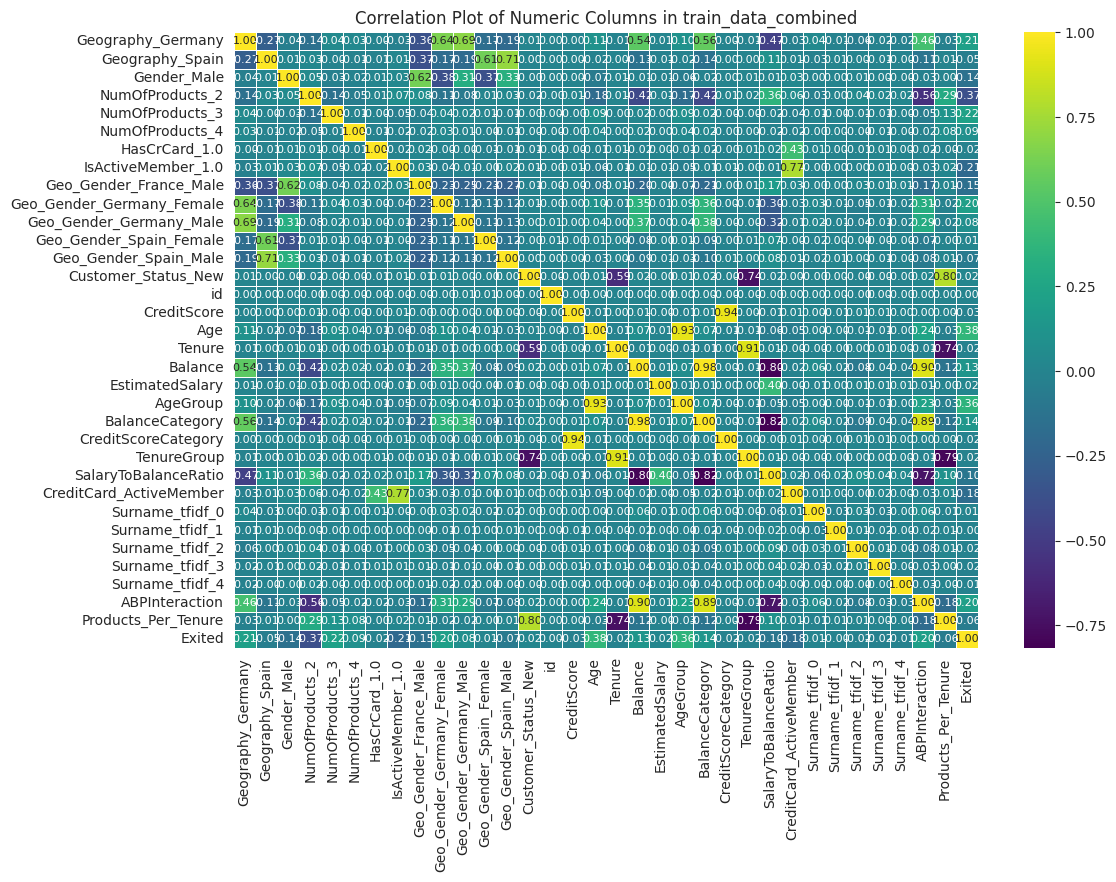

In [32]:
# Select numeric columns
numeric_cols = train_data_combined.select_dtypes(include=['number', 'bool'])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Create a heatmap using Seaborn with smaller font size for annotations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Plot of Numeric Columns in train_data_combined')
plt.show()

In [33]:
train_data_combined.drop(['CreditScore','Age','Tenure','Balance','EstimatedSalary','CreditCard_ActiveMember'],axis=1,inplace=True)

In [34]:
test_data_combined.drop(['CreditScore','Age','Tenure','Balance','EstimatedSalary','CreditCard_ActiveMember'],axis=1,inplace=True)

In [35]:
train_data_combined.head()

,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1.0,IsActiveMember_1.0,Geo_Gender_France_Male,Geo_Gender_Germany_Female,...,TenureGroup,SalaryToBalanceRatio,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4,ABPInteraction,Products_Per_Tenure,Exited
0,False,False,True,True,False,False,True,False,True,False,...,-0.598795,1.789938,-0.227830,-0.125151,0.069985,-0.152643,-0.017024,-0.79401,0.323448,0
1,False,False,True,True,False,False,True,True,True,False,...,-1.909735,-0.174300,-0.227831,-0.125187,0.069974,-0.152705,-0.016884,-0.79401,3.008107,0
2,False,False,True,True,False,False,True,False,True,False,...,2.023085,1.840801,-0.228405,-0.122165,0.051942,-0.172233,0.208727,-0.79401,-0.616183,0
3,False,False,True,False,False,False,True,True,True,False,...,-0.598795,-0.911231,-0.216729,-0.068302,0.115486,-0.038239,-0.477979,1.48440,-0.012134,0
4,False,True,True,True,False,False,True,True,False,False,...,0.712145,-0.686916,-0.227832,-0.125151,0.069977,-0.152658,-0.017006,-0.79401,-0.213484,0


# <span style="color:#ffffff; font-size: 1%;">[5] 🏗️ Model Building & Evaluation</span>

<div style=" border-bottom: 8px solid #A9A9A9; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #F2F4F2; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #5F5F5F; padding: 20px 20px;">[5] 🏗️📊 Model Building & Evaluation</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://images.pexels.com/photos/5466788/pexels-photo-5466788.jpeg?cs=srgb&dl=pexels-olia-danilevich-5466788.jpg&fm=jpg'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 10px;">
  </div>
</div>

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score

# Set a seed for reproducibility
seed = 42

# Initialize all the classification models in the requested format
log_reg = LogisticRegression(random_state=seed, max_iter=1000000)
svc = SVC(random_state=seed, probability=True)
lda = LinearDiscriminantAnalysis()
gnb = GaussianNB()
bnb = BernoulliNB()
knn = KNeighborsClassifier()
gauss = GaussianProcessClassifier(random_state=seed)
rf = RandomForestClassifier(random_state=seed)
et = ExtraTreesClassifier(random_state=seed)
xgb = XGBClassifier(random_state=seed)
lgb = LGBMClassifier(random_state=seed)
dart = LGBMClassifier(random_state=seed, boosting_type='dart')
cb = CatBoostClassifier(random_state=seed, verbose=0)
gb = GradientBoostingClassifier(random_state=seed)
hgb = HistGradientBoostingClassifier(random_state=seed)

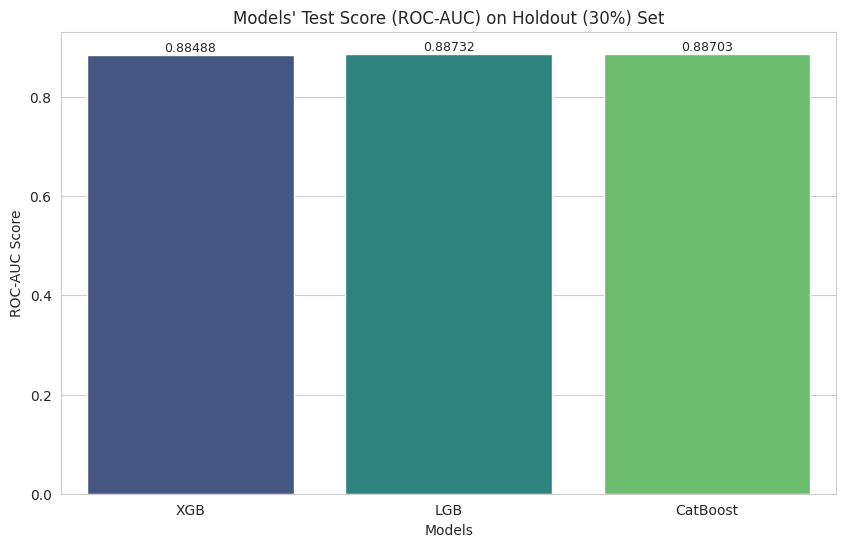

In [37]:
X = train_data_combined.drop('Exited',axis=1)
y = train_data_combined['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize classifiers
xgb = XGBClassifier(random_state=seed)
lgb = LGBMClassifier(random_state=seed)
cb = CatBoostClassifier(random_state=seed, verbose=0)

models = [xgb, lgb, cb]

def train_test_split_roc_auc(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict_proba(X_test)[:, 1]
    
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    
    return roc_auc_train, roc_auc_test

roc_auc_scores_train = []
roc_auc_scores_test = []

for model in models:
    roc_auc_train, roc_auc_test = train_test_split_roc_auc(model, X_train, y_train, X_test, y_test)
    roc_auc_scores_train.append(roc_auc_train)
    roc_auc_scores_test.append(roc_auc_test)

# Create a DataFrame with the scores and sort it
roc_auc_scores_df = pd.DataFrame(data={'ROC_AUC_Train': roc_auc_scores_train, 'ROC_AUC_Test': roc_auc_scores_test}, index=['XGB', 'LGB', 'CatBoost'])

# Plot ROC-AUC scores
plt.figure(figsize=(10, 6))
barplot_roc_auc = sns.barplot(x=roc_auc_scores_df.index, y='ROC_AUC_Test', data=roc_auc_scores_df, palette='viridis')

# Add values on the bars
for index, value in enumerate(roc_auc_scores_df['ROC_AUC_Test']):
    barplot_roc_auc.text(index, value + 0.001, str(round(value, 5)), ha='center', va='bottom', fontsize=9)

plt.title("Models' Test Score (ROC-AUC) on Holdout (30%) Set")
plt.xlabel('Models')
plt.ylabel('ROC-AUC Score')
plt.show()

# <span style="color:#ffffff; font-size: 1%;">[6] 📤 Submission</span>

<div style=" border-bottom: 8px solid #A9A9A9; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #F2F4F2; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #5F5F5F; padding: 20px 20px;">[6] 📤✅ Submission</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://images.pexels.com/photos/5466788/pexels-photo-5466788.jpeg?cs=srgb&dl=pexels-olia-danilevich-5466788.jpg&fm=jpg'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 10px;">
  </div>
</div>

In [38]:
import lightgbm as lgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# LGBM Model
lgb_params = {
    'max_depth': 8,
    'min_child_samples': 2,
    'learning_rate': 0.05530081215180204,
    'n_estimators': 669,
    'subsample': 0.30254466503794797,
    'colsample_bytree': 0.41087854836196963,
    'reg_alpha': 0.6241271382121083,
    'reg_lambda': 0.7111824512446496
}
lgb_model = lgb.LGBMClassifier(**lgb_params)

# XGBoost Model
xgb_params = {
    'max_depth': 6,
    'min_child_weight': 7,
    'learning_rate': 0.022213294578283638,
    'n_estimators': 797,
    'subsample': 0.9646514255068099,
    'colsample_bytree': 0.4208597039793016,
    'random_state': 42
}
xgb_model = XGBClassifier(**xgb_params)

# CatBoost Model
cat_params = {
    'iterations': 988,
    'depth': 9,
    'min_data_in_leaf': 16,
    'learning_rate': 0.02375062070726108,
    'verbose': 0
}
cat_model = CatBoostClassifier(**cat_params)

In [39]:
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold

# Initializing Stratified K-Fold with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initializing an MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    max_iter=1000,
    random_state=42,
    activation='relu',
    learning_rate_init=0.001,
    solver='adam',
    validation_fraction=0.1,
    momentum=0.9,
    nesterovs_momentum=True,
    batch_size=32,
    beta_1=0.9,
    beta_2=0.999
)

# Creating a StackingClassifier
stacking_model = StackingClassifier(
    estimators=[
        ('LGBM', lgb_model),
        ('XGB', xgb_model),
        ('CAT', cat_model)
    ],
    final_estimator=mlp,
    cv=skf
)

In [40]:
X = train_data_combined.drop('Exited', axis=1)
y = train_data_combined['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predict probabilities on the test set
stacking_test_predictions_proba = stacking_model.predict_proba(test_data_combined)[:, 1]

# Assuming 'test_data_combined' is the DataFrame for the test set
stacking_submission_df = pd.DataFrame({
    'id': test_data_to_scale['id'],
    'Exited': stacking_test_predictions_proba  # Fill in the predicted probabilities
})

# Save the submission DataFrame to a CSV file
stacking_submission_df.to_csv('submission.csv', index=False)

stacking_submission_df.head(10)

,id,Exited
0,165034,0.008628
1,165035,0.592937
2,165036,0.025062
3,165037,0.173755
4,165038,0.420016
5,165039,0.035139
6,165040,0.018995
7,165041,0.023825
8,165042,0.494058
9,165043,0.006141
